### Quick Sort
The quick-sort algorithm sorts a sequence S using a **recursive(遞回)** approach, and the main idea is to apply the **divide-and-conquer(分而治之)** technique.<br>
Particularly, we will use the following three steps to describe the quick-sort algorithm:<br>
- **Divide**: If Seqence S has at least two elements, select a specific element x from s, called the **pivot**(usually the last element in S). Partition the sequence S into three subsequences:<br>
(1)***Less(Left)***: store the elements in S less than pivot x<br>
(2)***Equal***: store the elements in S equal to pivot x<br>
(3)***Greater(Right)***: store the elements in S greater than pivot x<br>
- **Conquer**: Recurxively sort subsequences *Less* and *Greater*.<br>
- **Combine**: Combine the sorted subsequenes by a simple concatenation.<br>

#### example<br>
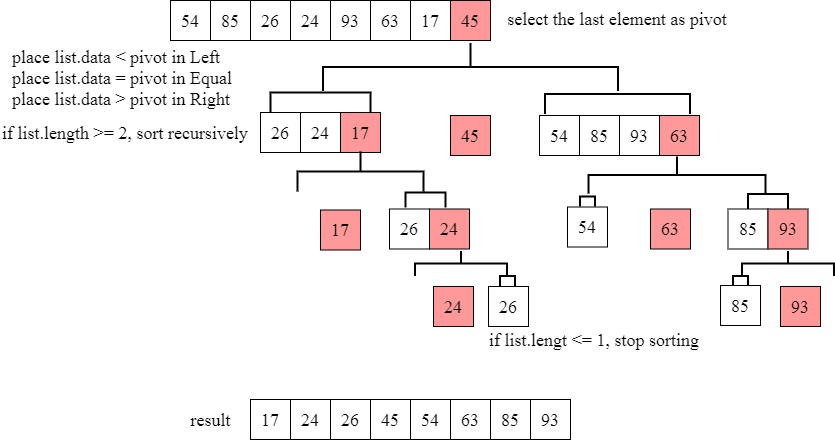

#### Flowchart
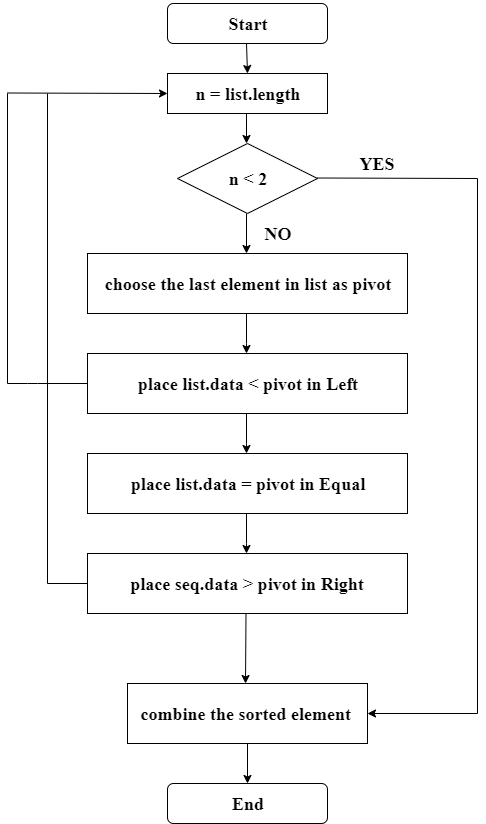

In [24]:
def quick_sort(seq):
    # nothing need to be done if the sequence has zero or one element
    n = len(seq)
    if n < 2:
        return seq
    
    # select the last element in the sequence as the pivot
    pivot = seq[-1]
    #print(pivot)
    
    # partition the sequence into three subseqences
    less = []
    equal = []
    greater = []
    
    for temp in seq:
        if temp < pivot:
            less.append(temp)
        elif temp == pivot:
            equal.append(temp)
        else:
            greater.append(temp)
    
    # recursively sort the subsequences less and greater and combine them using the operator "+" 
    return quick_sort(less) + equal + quick_sort(greater) 

In [23]:
seq = [54,85,26,24,93,63,17,45]
quick_sort(seq)

[17, 24, 26, 45, 54, 63, 85, 93]

#### Can we do additional optimizations for quick sort showed above?
An algorithm is **in-place**(原地置换) if it uses only a small amount of memory in addition to that needed for the original input. The implementation of quick-sort showed above does not qualify as in-place because we use additional containers L, E, and G
when dividing a sequence S within each recursive call. In-place quick-sort does not create additional subsequences but using **element swapping** to modify original input sequence. Local variables *left*, which advances rightward, and *right*, which advances leftward, will be used to scan the sequence simultaneously and swap pairs of elements in reverse order. The division step is complete When the two indices pass each other, and subsequences will be recursivly divided until the whole sequence is sorted.

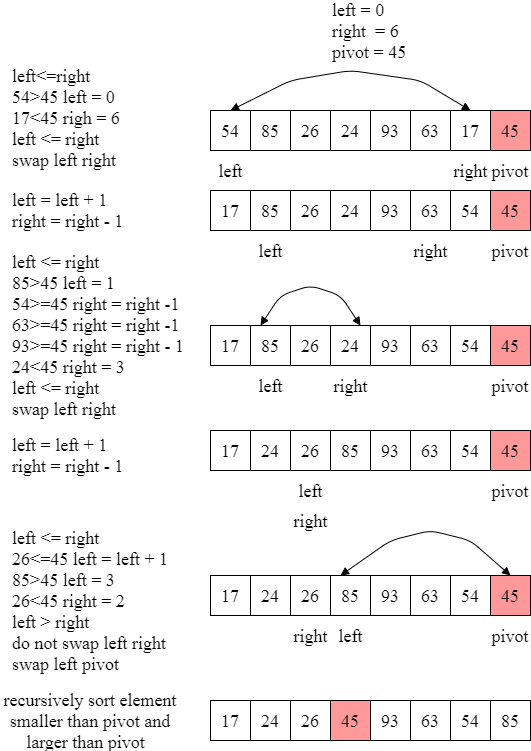

In [29]:
def inplace_quick_sort(seq, a , b):
    if a >= b: #range is trivially sorted
        return
    
    pivot = seq[b] #select last element as the pivot
    left = a #scan the sequence from left to right
    right = b - 1 #scan the sequence from right to left
    
    while left <= right:
        #scan until reaching an element lagrger than the pivot
        while left <= right and seq[left] <= pivot:
            left += 1
       
        #scan until reaching an element smaller than the pivot
        while left <= right and seq[right] >= pivot:
            right -= 1
        
        #if the two indices pass each other, the division step is complete
        if left <= right:
            seq[left], seq[right] = seq[right], seq[left] #swap elements
            left, right = left + 1, right - 1 
    #put the pivot into its correct place
    seq[left], seq[b] = seq[b], seq[left] 
       
    inplace_quick_sort(seq, a, left - 1) #recursively sort elements smaller than the pivot
    inplace_quick_sort(seq, left + 1, b) #recurisvely sort elements larger than the pivot
    return seq

In [30]:
seq = [54,85,85,26,24,93,63,17,45]
inplace_quick_sort(seq,0,len(seq)-1)

[17, 24, 26, 45, 54, 63, 85, 85, 93]

#### Time Complexities
- best case: O(nlogn) where n is the size of the sequence<br>
- wortst case: O(n^2)<br>
- average case: O(nlogn)<br>
[時間複雜度計算過程筆記-week5](https://github.com/Xu-Yidi/fluteanzi#week5)